In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
import pandas as pd
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import keras
keras.backend.backend()

Using TensorFlow backend.


'tensorflow'

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


 # Softmax classifier 

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [0]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 1.2892 - acc: 0.6962 - val_loss: 0.8094 - val_acc: 0.8334
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.7151 - acc: 0.8415 - val_loss: 0.6052 - val_acc: 0.8645
Epoch 3/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.5861 - acc: 0.8599 - val_loss: 0.5248 - val_acc: 0.8749
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.5245 - acc: 0.8690 - val_loss: 0.4789 - val_acc: 0.8835
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4870 - acc: 0.8756 - val_loss: 0.4494 - val_acc: 0.8866
Epoch 6/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.4612 - acc: 0.8800 - val_loss: 0.4280 - val_acc: 0.8910
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4422 - acc: 0.8836 - val_loss: 0.4123 - val_acc

Test score: 0.33589279960989954
Test accuracy: 0.9093


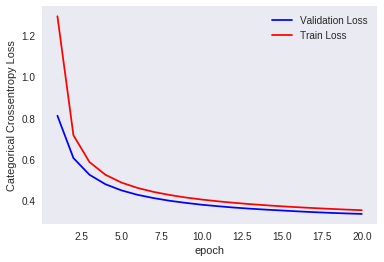

In [0]:
score_in_out = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_in_out[0]) 
print('Test accuracy:', score_in_out[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Observations**
1. We did not use any hidden layer and have only input and output layer and got accuracy ~90% which is best. 

# 1. MLP + ReLU + ADAM with 2 hidden layers

In [0]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.2267 - acc: 0.9321 - val_loss: 0.1241 - val_acc: 0.9638
Epoch 2/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0849 - acc: 0.9751 - val_loss: 0.0843 - val_acc: 0.9748
Epoch 3/20
60000/60000 [==============================] - 6s 106us/st

Test score: 0.0938020015134396
Test accuracy: 0.9807


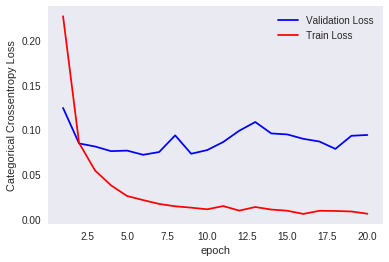

In [0]:
score_relu2_adam = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu2_adam[0])
print('Test accuracy:', score_relu2_adam[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


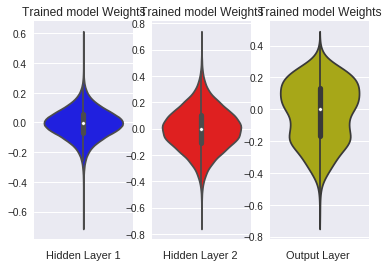

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + ReLU + ADAM with 2 hidden layers

In [0]:
model_relu = Sequential()

model_relu.add(Dense(672, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))

model_relu.add(Dense(325, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 672)               527520    
_________________________________________________________________
dense_6 (Dense)              (None, 325)               218725    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                3260      
Total params: 749,505
Trainable params: 749,505
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.2132 - acc: 0.9354 - val_loss: 0.1120 - val_acc: 0.9644
Epoch 2/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0761 - acc: 0.9764 - val_loss: 0.0763 - val_acc: 0.9761
Epoch 3/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0465 - acc: 0.9849 - val_loss: 0.1036 - val_acc: 0.9670
Epoch 4/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0335 - acc: 0.9894 - val_loss: 0.0692 - val_acc: 0.9786
Epoch 5/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0227 - acc: 0.9928 - val_loss: 0.0762 - val_acc: 0.9770
Epoch 6/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0200 - acc: 0.9929 - val_loss: 0.0603 - val_acc: 0.9819
Epoch 7/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0183 - acc: 0.9935 - val_loss: 0.0781 -

Test score: 0.08052913746033337
Test accuracy: 0.9845


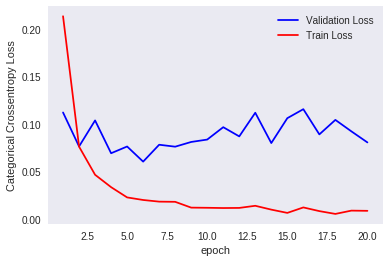

In [0]:
score_relu2_adam_diff = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu2_adam_diff[0]) 
print('Test accuracy:', score_relu2_adam_diff[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


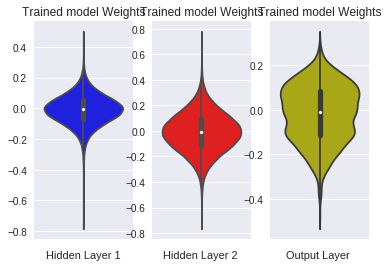

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + ReLU + ADAM with 3 hidden layers

In [0]:
model_relu = Sequential()

model_relu.add(Dense(532, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))

model_relu.add(Dense(291, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )

model_relu.add(Dense(187, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 532)               417620    
_________________________________________________________________
dense_9 (Dense)              (None, 291)               155103    
_________________________________________________________________
dense_10 (Dense)             (None, 187)               54604     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1880      
Total params: 629,207
Trainable params: 629,207
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.2101 - acc: 0.9357 - val_loss: 0.1166 - val_acc: 0.9632
Epoch 2/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0799 - acc: 0.9754 - val_loss: 0.1069 - val_acc: 0.9659
Epoch 3/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0521 - acc: 0.9835 - val_loss: 0.0745 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0385 - acc: 0.9880 - val_loss: 0.0724 - val_acc: 0.9776
Epoch 5/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0320 - acc: 0.9888 - val_loss: 0.0706 - val_acc: 0.9790
Epoch 6/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0241 - acc: 0.9918 - val_loss: 0.0838 - val_acc: 0.9769
Epoch 7/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0238 - acc: 0.9922 - val_loss: 0.0749 - 

Test score: 0.10949685554472845
Test accuracy: 0.9773


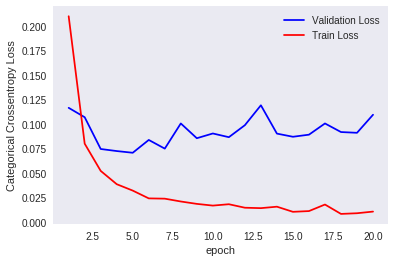

In [0]:
score_relu3_adam = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu3_adam[0]) 
print('Test accuracy:', score_relu3_adam[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


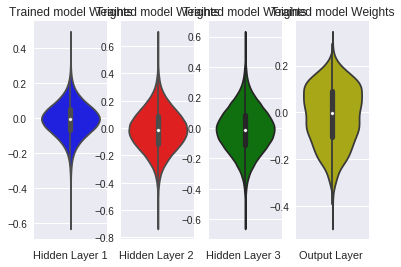

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + ReLU + ADAM with 5 hidden layers

In [0]:
model_relu = Sequential()

model_relu.add(Dense(532, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))

model_relu.add(Dense(443, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_relu.add(Dense(291, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_relu.add(Dense(167, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_relu.add(Dense(125, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 532)               417620    
_________________________________________________________________
dense_13 (Dense)             (None, 443)               236119    
_________________________________________________________________
dense_14 (Dense)             (None, 291)               129204    
_________________________________________________________________
dense_15 (Dense)             (None, 167)               48764     
_________________________________________________________________
dense_16 (Dense)             (None, 125)               21000     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1260      
Total params: 853,967
Trainable params: 853,967
Non-trainable params: 0
_________________________________________________________________
None

In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.2453 - acc: 0.9270 - val_loss: 0.1146 - val_acc: 0.9624
Epoch 2/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.0974 - acc: 0.9696 - val_loss: 0.1039 - val_acc: 0.9669
Epoch 3/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0683 - acc: 0.9781 - val_loss: 0.1020 - val_acc: 0.9702
Epoch 4/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0529 - acc: 0.9826 - val_loss: 0.1084 - val_acc: 0.9689
Epoch 5/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0419 - acc: 0.9868 - val_loss: 0.0915 - val_acc: 0.9751
Epoch 6/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0391 - acc: 0.9875 - val_loss: 0.0955 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0338 - acc: 0.9890 - val_loss: 0.

Test score: 0.1017726518217185
Test accuracy: 0.9787


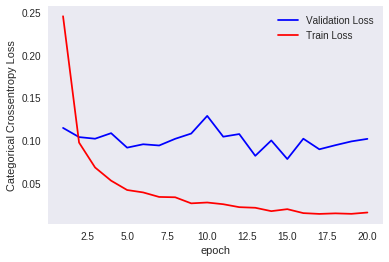

In [0]:
score_relu5_adam = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu5_adam[0])
print('Test accuracy:', score_relu5_adam[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


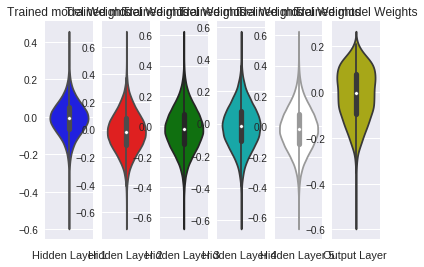

In [0]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='w')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Observations**
1. We used MLP with 2, 3 and 5 different layer and got accuracy ~98%  but the difference between train loss and validataion loss is slightly high and could so happen that we are overfitting. 
2. Weight distributions is not too small and not too large and mean is at 0, which is a good sign of not getting into problem of vanishing or exploding gradient.

# 2. MLP + Batch-Norm + AdamOptimizer with 2 hidden layer

In [0]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [0]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.2004 - acc: 0.9403 - val_loss: 0.1036 - val_acc: 0.9685
Epoch 2/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.0724 - acc: 0.9788 - val_loss: 0.0989 - val_acc: 0.9677
Epoch 3/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0470 - acc: 0.9858 - val_loss: 0.0763 - val_acc: 0.9763
Epoch 4/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0319 - acc: 0.9903 - val_loss: 0.0796 - val_acc: 0.9746
Epoch 5/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0252 - acc: 0.9921 - val_loss: 0.0835 - val_acc: 0.9741
Epoch 6/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.0206 - acc: 0.9934 - val_loss: 0.0764 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0161 - acc: 0.9952 - val_loss: 0.0744 - 

Test score: 0.08353556353475215
Test accuracy: 0.9796


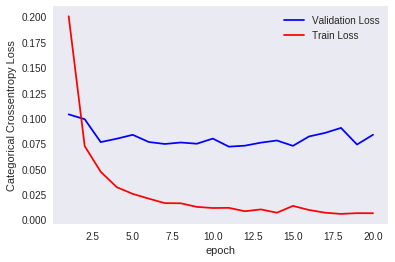

In [0]:
score_relu_bn2 = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu_bn2[0]) 
print('Test accuracy:', score_relu_bn2[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


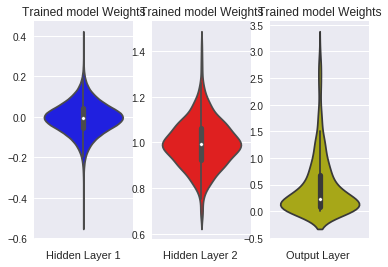

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + Batch-Norm + AdamOptimizer with 2 hidden layer

In [0]:
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Dense(526, activation = 'relu', input_shape=(input_dim,), kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.039, seed = None)))
model_batch.add(BatchNormalization())

model.add(Dense(207, activation = 'relu', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.55, seed = None)) )
model.add(BatchNormalization())

model.add(Dense(output_dim, activation = 'softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 526)               412910    
_________________________________________________________________
dense_22 (Dense)             (None, 207)               109089    
_________________________________________________________________
batch_normalization_4 (Batch (None, 207)               828       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2080      
Total params: 524,907
Trainable params: 524,493
Non-trainable params: 414
_________________________________________________________________


In [0]:
model_batch.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 151us/step - loss: 6.3680 - acc: 0.9433 - val_loss: 0.7874 - val_acc: 0.9297
Epoch 2/20
60000/60000 [==============================] - 8s 138us/step - loss: 1.6970 - acc: 0.9770 - val_loss: 0.3159 - val_acc: 0.9657
Epoch 3/20
60000/60000 [==============================] - 8s 129us/step - loss: 4.0755 - acc: 0.9641 - val_loss: 0.3803 - val_acc: 0.9577
Epoch 4/20
60000/60000 [==============================] - 8s 127us/step - loss: 2.9868 - acc: 0.9269 - val_loss: 0.8841 - val_acc: 0.9068
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 3.3244 - acc: 0.9279 - val_loss: 1.9595 - val_acc: 0.9336
Epoch 6/20
60000/60000 [==============================] - 8s 129us/step - loss: 3.1933 - acc: 0.9081 - val_loss: 0.7247 - val_acc: 0.9247
Epoch 7/20
60000/60000 [==============================] - 8s 129us/step - loss: 3.7201 - acc: 0.9356 - val_loss: 3.2534 - 

Test score: 6.459873273468018
Test accuracy: 0.8002


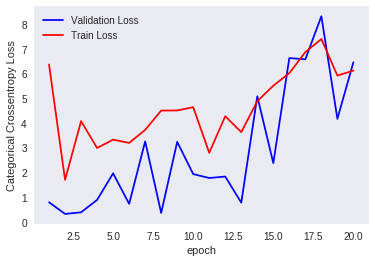

In [0]:
score_relu_bn2_diff = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu_bn2_diff[0])
print('Test accuracy:', score_relu_bn2_diff[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


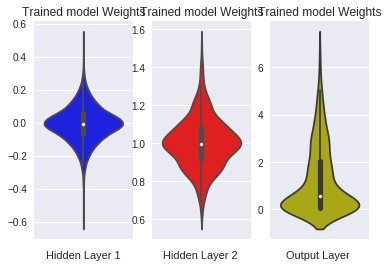

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + Batch-Norm + AdamOptimizer with 3 hidden layer

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(345, activation = 'relu', input_shape=(input_dim,), kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.039, seed = None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(198, activation = 'relu', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.55, seed = None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(57, activation = 'relu', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.55, seed = None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation = 'softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 345)               270825    
_________________________________________________________________
batch_normalization_5 (Batch (None, 345)               1380      
_________________________________________________________________
dense_25 (Dense)             (None, 198)               68508     
_________________________________________________________________
batch_normalization_6 (Batch (None, 198)               792       
_________________________________________________________________
dense_26 (Dense)             (None, 57)                11343     
_________________________________________________________________
batch_normalization_7 (Batch (None, 57)                228       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                580       
Total para

In [0]:
model_batch.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.2364 - acc: 0.9325 - val_loss: 0.1118 - val_acc: 0.9669
Epoch 2/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.0867 - acc: 0.9745 - val_loss: 0.0937 - val_acc: 0.9713
Epoch 3/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.0532 - acc: 0.9839 - val_loss: 0.0831 - val_acc: 0.9763
Epoch 4/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0395 - acc: 0.9875 - val_loss: 0.0867 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.0286 - acc: 0.9913 - val_loss: 0.0807 - val_acc: 0.9759
Epoch 6/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0237 - acc: 0.9926 - val_loss: 0.0836 - val_acc: 0.9752
Epoch 7/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0179 - acc: 0.9944 - val_loss: 0.0777 - 

Test score: 0.08087161136912183
Test accuracy: 0.9798


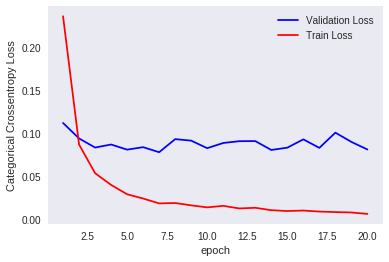

In [0]:
score_relu_bn3 = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu_bn3[0]) 
print('Test accuracy:', score_relu_bn3[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


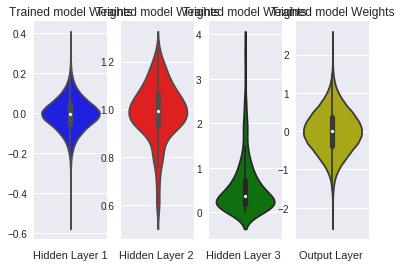

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1, 1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + Batch-Norm + AdamOptimizer with 5 hidden layer

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(451, activation = 'relu', input_shape=(input_dim,), kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.039, seed = None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(272, activation = 'relu', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.55, seed = None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(180, activation = 'relu', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.55, seed = None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(97, activation = 'relu', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.55, seed = None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(56, activation = 'relu', kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.55, seed = None)))
model_batch.add(BatchNormalization())


model_batch.add(Dense(output_dim, activation = 'softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 451)               354035    
_________________________________________________________________
batch_normalization_8 (Batch (None, 451)               1804      
_________________________________________________________________
dense_29 (Dense)             (None, 272)               122944    
_________________________________________________________________
batch_normalization_9 (Batch (None, 272)               1088      
_________________________________________________________________
dense_30 (Dense)             (None, 180)               49140     
_________________________________________________________________
batch_normalization_10 (Batc (None, 180)               720       
_________________________________________________________________
dense_31 (Dense)             (None, 97)                17557     
__________

In [0]:
model_batch.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.2851 - acc: 0.9181 - val_loss: 0.1306 - val_acc: 0.9617
Epoch 2/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.0984 - acc: 0.9705 - val_loss: 0.1051 - val_acc: 0.9672
Epoch 3/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0643 - acc: 0.9797 - val_loss: 0.1007 - val_acc: 0.9700
Epoch 4/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0470 - acc: 0.9852 - val_loss: 0.0886 - val_acc: 0.9742
Epoch 5/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0364 - acc: 0.9880 - val_loss: 0.0925 - val_acc: 0.9723
Epoch 6/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0343 - acc: 0.9886 - val_loss: 0.0877 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 10s 172us/step - loss: 0.0266 - acc: 0.9913 - val_loss: 0.

Test score: 0.0770734781166655
Test accuracy: 0.9815


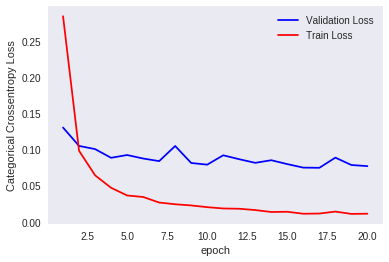

In [0]:
score_relu_bn5 = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu_bn5[0]) 
print('Test accuracy:', score_relu_bn5[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


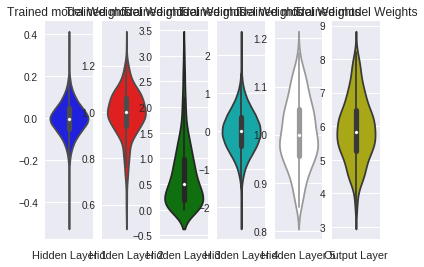

In [0]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='w')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer')
plt.show()

**Observations**
1. We did not get good accuracy with 2 and 3 hidden layer and also mean of weights deviated from 0 to 1.
2. With 5 hidden layer we got slightly good accuracy than 2 and 3 hidden layer.

# 3. MLP + Dropout + AdamOptimizer with 2 hidden layer

In [0]:
from keras.layers import Dropout

model_drop = Sequential()


model_drop.add(Dense(370, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(112, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 370)               290450    
_________________________________________________________________
dropout_1 (Dropout)          (None, 370)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 112)               41552     
_________________________________________________________________
dropout_2 (Dropout)          (None, 112)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1130      
Total params: 333,132
Trainable params: 333,132
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.7979 - acc: 0.7623 - val_loss: 0.2223 - val_acc: 0.9376
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3699 - acc: 0.8913 - val_loss: 0.1647 - val_acc: 0.9518
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2955 - acc: 0.9159 - val_loss: 0.1420 - val_acc: 0.9588
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2479 - acc: 0.9279 - val_loss: 0.1250 - val_acc: 0.9627
Epoch 5/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2196 - acc: 0.9374 - val_loss: 0.1111 - val_acc: 0.9679
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.1952 - acc: 0.9437 - val_loss: 0.1095 - val_acc: 0.9685
Epoch 7/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.1912 - acc: 0.9458 - val_loss: 0.1030 - val_a

Test score: 0.0825668051331857
Test accuracy: 0.9783


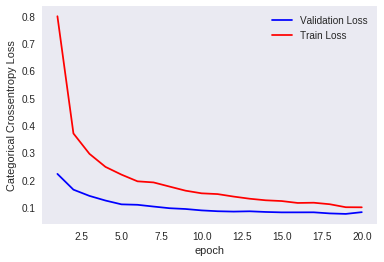

In [0]:
score_relu_drop2 = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu_drop2[0]) 
print('Test accuracy:', score_relu_drop2[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


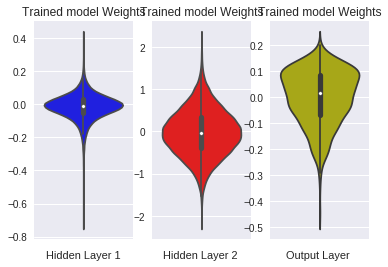

In [0]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + Dropout + AdamOptimizer with 3 hidden layer

In [0]:
from keras.layers import Dropout

model_drop = Sequential()


model_drop.add(Dense(531, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(375, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(130, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 531)               416835    
_________________________________________________________________
dropout_3 (Dropout)          (None, 531)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 375)               199500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 375)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 130)               48880     
_________________________________________________________________
dropout_5 (Dropout)          (None, 130)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1310      
Total para

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 192us/step - loss: 10.2589 - acc: 0.3486 - val_loss: 7.0777 - val_acc: 0.5562
Epoch 2/20
60000/60000 [==============================] - 10s 169us/step - loss: 7.3090 - acc: 0.5348 - val_loss: 3.8307 - val_acc: 0.7542
Epoch 3/20
60000/60000 [==============================] - 10s 170us/step - loss: 5.3924 - acc: 0.6534 - val_loss: 3.1545 - val_acc: 0.7970
Epoch 4/20
60000/60000 [==============================] - 10s 170us/step - loss: 4.1462 - acc: 0.7304 - val_loss: 2.2189 - val_acc: 0.8528
Epoch 5/20
60000/60000 [==============================] - 10s 170us/step - loss: 3.3093 - acc: 0.7818 - val_loss: 1.6668 - val_acc: 0.8914
Epoch 6/20
60000/60000 [==============================] - 10s 170us/step - loss: 2.6803 - acc: 0.8215 - val_loss: 1.4504 - val_acc: 0.9052
Epoch 7/20
60000/60000 [==============================] - 10s 171us/step - loss: 2.3632 - acc: 0.8423 - val_loss: 1

Test score: 0.37853595131413315
Test accuracy: 0.9328


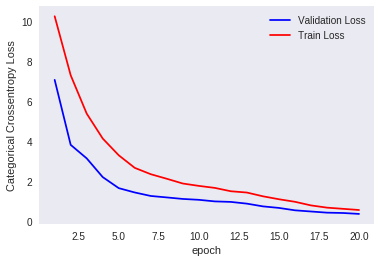

In [0]:
score_relu_drop3 = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu_drop3[0]) 
print('Test accuracy:', score_relu_drop3[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


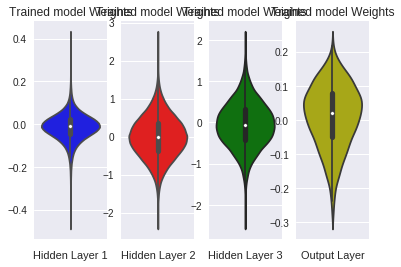

In [0]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer')
plt.show()

# MLP + Dropout + AdamOptimizer with 5 hidden layer

In [0]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(681, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(Dropout(0.5)) 

model_drop.add(Dense(475, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(230, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(102, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(28, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 681)               534585    
_________________________________________________________________
dropout_6 (Dropout)          (None, 681)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 475)               323950    
_________________________________________________________________
dropout_7 (Dropout)          (None, 475)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 230)               109480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 230)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 102)               23562     
__________

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 274us/step - loss: 14.4528 - acc: 0.1023 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 2/20
60000/60000 [==============================] - 15s 249us/step - loss: 14.4791 - acc: 0.1008 - val_loss: 13.5250 - val_acc: 0.1608
Epoch 3/20
60000/60000 [==============================] - 15s 250us/step - loss: 14.4756 - acc: 0.1010 - val_loss: 14.4821 - val_acc: 0.1015
Epoch 4/20
60000/60000 [==============================] - 15s 250us/step - loss: 14.5060 - acc: 0.0991 - val_loss: 14.4602 - val_acc: 0.1028
Epoch 5/20
60000/60000 [==============================] - 15s 249us/step - loss: 14.4631 - acc: 0.1014 - val_loss: 13.9306 - val_acc: 0.1352
Epoch 6/20
60000/60000 [==============================] - 15s 253us/step - loss: 14.4937 - acc: 0.0995 - val_loss: 14.5434 - val_acc: 0.0977
Epoch 7/20
60000/60000 [==============================] - 15s 252us/step - loss: 14.4749 - acc: 0.1003 -

Test score: 14.535298265075683
Test accuracy: 0.0982


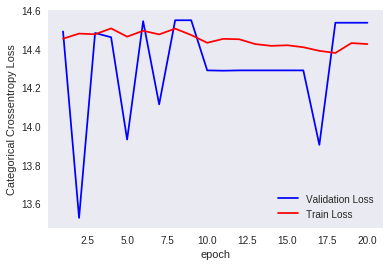

In [0]:
score_relu_drop5 = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu_drop5[0]) 
print('Test accuracy:', score_relu_drop5[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


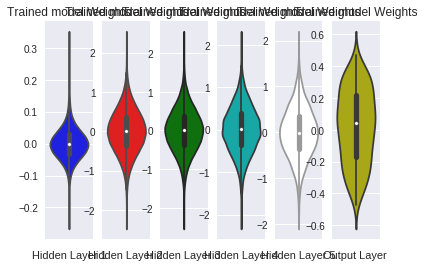

In [0]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='w')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Observations**<br>
1. We use 2, 3 and 5 different layer architecture with dropout and did not get good accuracy in 5 layer architecture whereas first 2 model architecture works very well. 

# 4. MLP + RELU + Dropout + BatchNormalization + AdamOptimizer with 2 hidden layers

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()


model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1290      
Total para

In [0]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.4788 - acc: 0.8538 - val_loss: 0.1682 - val_acc: 0.9482
Epoch 2/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.2481 - acc: 0.9256 - val_loss: 0.1240 - val_acc: 0.9608
Epoch 3/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.2007 - acc: 0.9398 - val_loss: 0.1035 - val_acc: 0.9670
Epoch 4/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.1705 - acc: 0.9483 - val_loss: 0.0938 - val_acc: 0.9713
Epoch 5/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.1532 - acc: 0.9536 - val_loss: 0.0904 - val_acc: 0.9713
Epoch 6/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1423 - acc: 0.9571 - val_loss: 0.0815 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.1290 - acc: 0.9613 - val_loss: 0.0758 -

Test score: 0.0575819099090164
Test accuracy: 0.9831


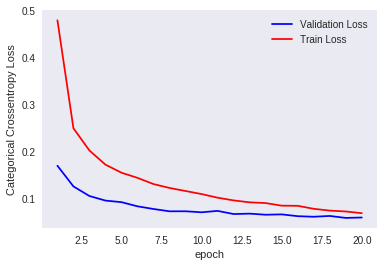

In [0]:
score_relu_bn_drop2 = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu_bn_drop2[0]) 
print('Test accuracy:', score_relu_bn_drop2[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


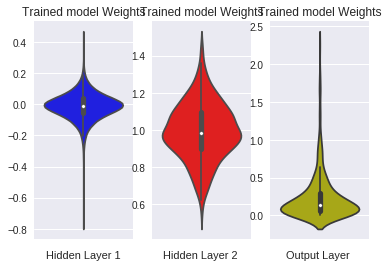

In [0]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + RELU + Dropout + BatchNormalization with 2 hidden layers

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(389, activation = "relu", input_shape = (input_dim,), kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.039, seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(258, activation = "relu", kernel_initializer = RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation = "softmax"))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 389)               305365    
_________________________________________________________________
batch_normalization_15 (Batc (None, 389)               1556      
_________________________________________________________________
dropout_13 (Dropout)         (None, 389)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 258)               100620    
_________________________________________________________________
batch_normalization_16 (Batc (None, 258)               1032      
_________________________________________________________________
dropout_14 (Dropout)         (None, 258)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                2590      
Total para

In [0]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.4825 - acc: 0.8528 - val_loss: 0.1709 - val_acc: 0.9461
Epoch 2/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.2447 - acc: 0.9261 - val_loss: 0.1278 - val_acc: 0.9589
Epoch 3/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1989 - acc: 0.9403 - val_loss: 0.1035 - val_acc: 0.9673
Epoch 4/20
60000/60000 [==============================] - 8s 136us/step - loss: 0.1704 - acc: 0.9486 - val_loss: 0.0947 - val_acc: 0.9710
Epoch 5/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.1525 - acc: 0.9535 - val_loss: 0.0884 - val_acc: 0.9732
Epoch 6/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.1348 - acc: 0.9576 - val_loss: 0.0808 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.1287 - acc: 0.9605 - val_loss: 0.0857 -

Test score: 0.06233537118713721
Test accuracy: 0.982


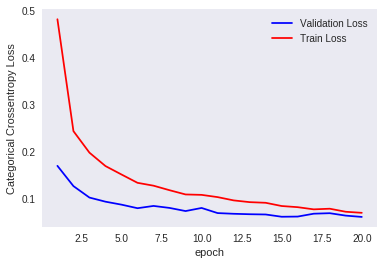

In [0]:
score_relu_bn_drop2_diff = model.evaluate(X_test, Y_test, verbose = 0) 
print('Test score:', score_relu_bn_drop2_diff[0])
print('Test accuracy:', score_relu_bn_drop2_diff[1])

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


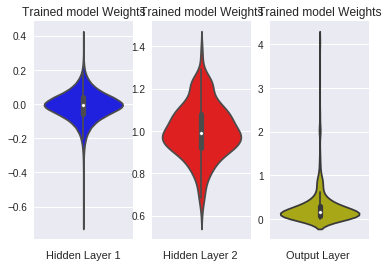

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + RELU + Dropout + BatchNormalization with 3 hidden layers

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(434, activation = "relu", input_shape = (input_dim,), kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.039, seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(391, activation = "relu", kernel_initializer = RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(141, activation = "relu", kernel_initializer = RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 

model.add(Dense(output_dim, activation = "softmax"))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 434)               340690    
_________________________________________________________________
batch_normalization_17 (Batc (None, 434)               1736      
_________________________________________________________________
dropout_15 (Dropout)         (None, 434)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 391)               170085    
_________________________________________________________________
batch_normalization_18 (Batc (None, 391)               1564      
_________________________________________________________________
dropout_16 (Dropout)         (None, 391)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 141)               55272     
__________

In [0]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.7627 - acc: 0.7634 - val_loss: 0.2058 - val_acc: 0.9349
Epoch 2/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.3444 - acc: 0.8963 - val_loss: 0.1534 - val_acc: 0.9528
Epoch 3/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.2640 - acc: 0.9214 - val_loss: 0.1295 - val_acc: 0.9589
Epoch 4/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.2262 - acc: 0.9333 - val_loss: 0.1163 - val_acc: 0.9630
Epoch 5/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.1982 - acc: 0.9404 - val_loss: 0.1032 - val_acc: 0.9688
Epoch 6/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.1781 - acc: 0.9472 - val_loss: 0.0954 - val_acc: 0.9705
Epoch 7/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.1633 - acc: 0.9515 - val_loss: 0.

Test score: 0.0605601929532073
Test accuracy: 0.9824


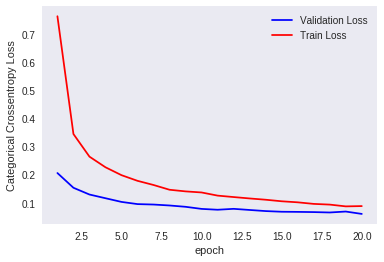

In [0]:
score_relu_bn_drop3 = model.evaluate(X_test, Y_test, verbose = 0) 
print('Test score:', score_relu_bn_drop3[0]) 
print('Test accuracy:', score_relu_bn_drop3[1])

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


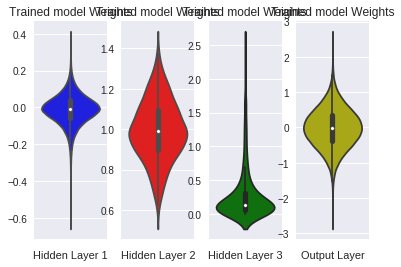

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer')
plt.show()

# MLP + RELU + Dropout + BatchNormalization with 5 hidden layers

In [0]:
model = Sequential()

model.add(Dense(697, activation = "relu", input_shape = (input_dim,), kernel_initializer = RandomNormal(mean = 0.0, stddev = 0.039, seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(458, activation = "relu", kernel_initializer = RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(246, activation = "relu", kernel_initializer = RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 

model.add(Dense(111, activation = "relu", kernel_initializer = RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 

model.add(Dense(58, activation = "relu", kernel_initializer = RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5)) 


model.add(Dense(output_dim, activation = "softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 697)               547145    
_________________________________________________________________
batch_normalization_20 (Batc (None, 697)               2788      
_________________________________________________________________
dropout_18 (Dropout)         (None, 697)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 458)               319684    
_________________________________________________________________
batch_normalization_21 (Batc (None, 458)               1832      
_________________________________________________________________
dropout_19 (Dropout)         (None, 458)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 246)               112914    
__________

In [0]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = nb_epoch, verbose = 1, validation_data = (X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 361us/step - loss: 1.7259 - acc: 0.4318 - val_loss: 0.5132 - val_acc: 0.8749
Epoch 2/20
60000/60000 [==============================] - 19s 315us/step - loss: 0.7668 - acc: 0.7482 - val_loss: 0.2942 - val_acc: 0.9223
Epoch 3/20
60000/60000 [==============================] - 18s 305us/step - loss: 0.5112 - acc: 0.8477 - val_loss: 0.2180 - val_acc: 0.9381
Epoch 4/20
60000/60000 [==============================] - 18s 304us/step - loss: 0.4055 - acc: 0.8850 - val_loss: 0.1769 - val_acc: 0.9489
Epoch 5/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.3332 - acc: 0.9080 - val_loss: 0.1535 - val_acc: 0.9565
Epoch 6/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.2908 - acc: 0.9211 - val_loss: 0.1379 - val_acc: 0.9623
Epoch 7/20
60000/60000 [==============================] - 18s 305us/step - loss: 0.2566 - acc: 0.9311 - val_loss: 0.

Test score: 0.07801552013880574
Test accuracy: 0.9801


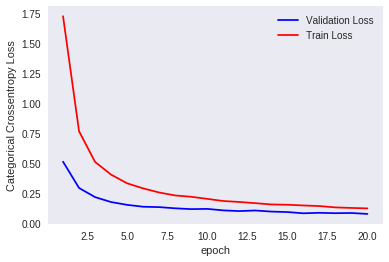

In [0]:
score_relu_bn_drop5 = model.evaluate(X_test, Y_test, verbose = 0) 
print('Test score:', score_relu_bn_drop5[0]) 
print('Test accuracy:', score_relu_bn_drop5[1])

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


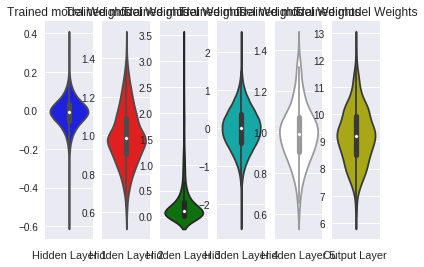

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='w')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Observations**<br>

1.  As we can see when apply bn + dropout each and every model performs well. 

**Conclusions**<br>
1. We perform various different types of model architecture and with different layers and also plotted train and validation error graph. We observe that when applied BN + Dropout with three different architecture models perfoms very well. And, when apply only dropout with 5 hidden layer, BN with 3 hidden layer, it works worse than all.
2. We also check for the weights of model and found that weights are slightly small in BN and Droupout, when applied individually. Other than this, model with only I/O layer also performs quite well.
3. We can also see the model performence chart in below table.

In [0]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["MODEL", "ACCURACY"]

x.add_row(["MLP with only I/O layer", score_in_out[1]])
x.add_row(["MLP with 2 hidden layer", score_relu2_adam[1]])
x.add_row(["MLP with 2 hidden layer", score_relu2_adam_diff[1]])
x.add_row(["MLP with 3 hidden layer", score_relu3_adam[1]])
x.add_row(["MLP + BN with 2 hidden layer", score_relu5_adam[1]])
x.add_row(["MLP + BN with 2 hidden layer", score_relu_bn2[1]])
x.add_row(["MLP + BN with 3 hidden layer", score_relu_bn2_diff[1]])
x.add_row(["MLP + BN with 5 hidden layer", score_relu_bn3[1]])
x.add_row(["MLP + Dropout with 2 hidden layer", score_relu_bn5[1]])
x.add_row(["MLP + Dropout with 2 hidden layer", score_relu_drop2[1]])
x.add_row(["MLP + Dropout with 3 hidden layer", score_relu_drop3[1]])
x.add_row(["MLP + Dropout with 5 hidden layer", score_relu_drop5[1]])
x.add_row(["MLP + BN + Dropout with 2 hidden layers", score_relu_bn_drop2[1]])
x.add_row(["MLP + BN + Dropout with 2 hidden layers", score_relu_bn_drop2_diff[1]])
x.add_row(["MLP + BN + Dropout with 3 hidden layers", score_relu_bn_drop3[1]])
x.add_row(["MLP + BN + Dropout with 5 hidden layers", score_relu_bn_drop5[1]])


print(x)

+-----------------------------------------+----------+
|                  MODEL                  | ACCURACY |
+-----------------------------------------+----------+
|         MLP with only I/O layer         |  0.9093  |
|         MLP with 2 hidden layer         |  0.9807  |
|         MLP with 2 hidden layer         |  0.9845  |
|         MLP with 3 hidden layer         |  0.9773  |
|       MLP + BN with 2 hidden layer      |  0.9787  |
|       MLP + BN with 2 hidden layer      |  0.9796  |
|       MLP + BN with 3 hidden layer      |  0.8002  |
|       MLP + BN with 5 hidden layer      |  0.9798  |
|    MLP + Dropout with 2 hidden layer    |  0.9815  |
|    MLP + Dropout with 2 hidden layer    |  0.9783  |
|    MLP + Dropout with 3 hidden layer    |  0.9328  |
|    MLP + Dropout with 5 hidden layer    |  0.0982  |
| MLP + BN + Dropout with 2 hidden layers |  0.9831  |
| MLP + BN + Dropout with 2 hidden layers |  0.982   |
| MLP + BN + Dropout with 3 hidden layers |  0.9824  |
| MLP + BN